   # Exploratory Data Analysis of Haberman dataset
   
In this Haberman dataset people undergone treatment for cancer,after the treatment depend upon the survival status there are two kind of people

1.People who survived more than 5 years,
2.People who survived less than 5 years

Objective : To classify the survival status of a patient by using given three features like Patient age,Operation year and number of auxillary nodes

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the haberman dataset
data=pd.read_csv('haberman.csv')
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
# To know number of rows and columns present in given dataset
print(data.shape)

(306, 4)


In [4]:
# Replaced the feature names as following to get better understanding
data.columns=['Patient_age','Operation_year','Auxillary_nodes','Status']
data

,Patient_age,Operation_year,Auxillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
# Represented the Survival status of people 1.who survived more than 5 years, 2.who survived less than 5 years
data.loc[data['Status'] == 1, 'Status'] = "Who Survived more than 5 years"
data.loc[data['Status'] == 2, 'Status'] = "Who Survived less than 5 years"
data

,Patient_age,Operation_year,Auxillary_nodes,Status
0,30,64,1,Who Survived more than 5 years
1,30,62,3,Who Survived more than 5 years
2,30,65,0,Who Survived more than 5 years
3,31,59,2,Who Survived more than 5 years
4,31,65,4,Who Survived more than 5 years
...,...,...,...,...
301,75,62,1,Who Survived more than 5 years
302,76,67,0,Who Survived more than 5 years
303,77,65,3,Who Survived more than 5 years
304,78,65,1,Who Survived less than 5 years


In [6]:
# Checking for null values
data.isnull().sum()

Patient_age        0
Operation_year     0
Auxillary_nodes    0
Status             0
dtype: int64

In [7]:
# To know the number of people in each category of survial status
data['Status'].value_counts()

Who Survived more than 5 years    225
Who Survived less than 5 years     81
Name: Status, dtype: int64

In [8]:
# To know everything about the dataset including size,datatypes and number of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient_age      306 non-null    int64 
 1   Operation_year   306 non-null    int64 
 2   Auxillary_nodes  306 non-null    int64 
 3   Status           306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [9]:
# To know statistical details of features present in dataset
data.describe()

,Patient_age,Operation_year,Auxillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


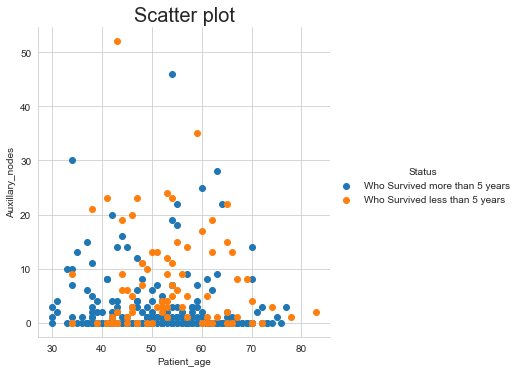

In [26]:
#2D Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='Status',height=5)\
.map(plt.scatter,'Patient_age','Auxillary_nodes')\
.add_legend()
plt.title('Scatter plot',size=20)
plt.show()

#### Observations

1. Most of the people are having less than 10 nodes and very few people are having nodes greater than 20
2. Patient whose age between 40 and 50 is having highest number of nodes which means less chance of survival
3. Less than 10 nodes people are more overlapped seperating them based on survival status is very hard

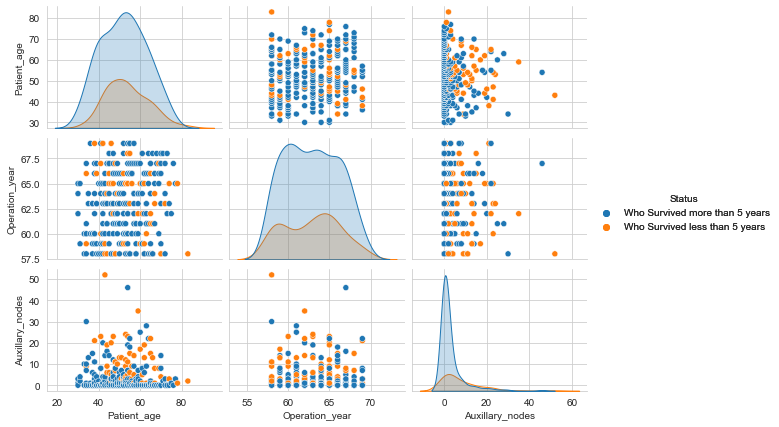

In [32]:
# Pair plot
sns.set_style("whitegrid")
sns.pairplot(data,hue='Status', diag_kind='kde',height=2)\
.add_legend()
plt.show()

#### Observations
1. We have 3 features which effects the survival status of patients,so here total 9 plots came and all diagonal plots are PDFs of each feature
2. Here also in all pair plot of any two features, the two classes of people are mixed and overlapped,so it is difficult to analyse survival status clearly

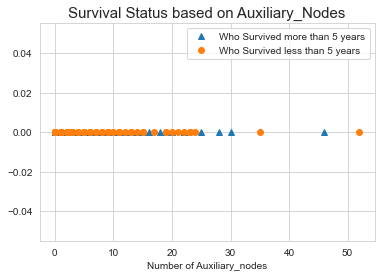

In [12]:
#1D Scatter plot
more_survived = data.loc[data["Status"] == "Who Survived more than 5 years"]
less_survived = data.loc[data["Status"] == "Who Survived less than 5 years"]
plt.plot(more_survived["Auxillary_nodes"],np.zeros_like(more_survived["Auxillary_nodes"]),'^')
plt.plot(less_survived["Auxillary_nodes"],np.zeros_like(less_survived["Auxillary_nodes"]),'o')
plt.xlabel('Number of Auxiliary_nodes')
plt.legend(["Who Survived more than 5 years","Who Survived less than 5 years"])
plt.title('Survival Status based on Auxiliary_Nodes', size = 15)
plt.show()

In this 1D Scatter plot people are highly overlapped and difficult to make any conclusion from looking into plot

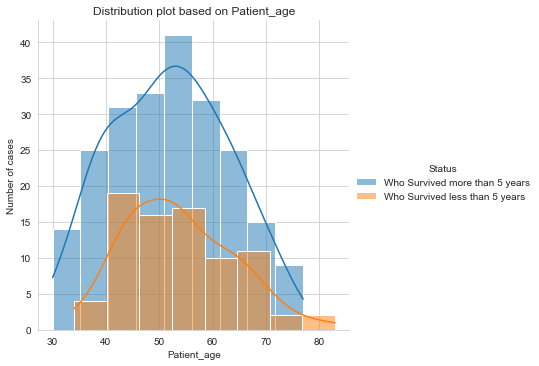

In [13]:
sns.FacetGrid(data,hue="Status",height=5)\
.map(sns.histplot,'Patient_age',kde=True)\
.add_legend()
plt.xlabel('Patient_age')
plt.ylabel('Number of cases')
plt.title('Distribution plot based on Patient_age')
plt.show()

#### Observations
1. There are more people who survived more than 5 years compared to who survived less than 5 years after getting the treatment
2. There are less number of patients whose age is below 30 and above 80

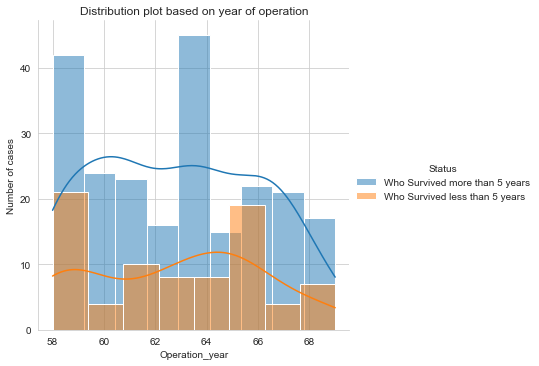

In [14]:
sns.FacetGrid(data,hue="Status",height=5)\
.map(sns.histplot,'Operation_year',kde=True)\
.add_legend()
plt.xlabel('Operation_year')
plt.ylabel('Number of cases')
plt.title('Distribution plot based on year of operation')
plt.show()

#### Observation
1. Who got treatment in operation_year 63, nearly 45 patients were survived more than 5 years and nearly 8 patients were survived less than 5 years

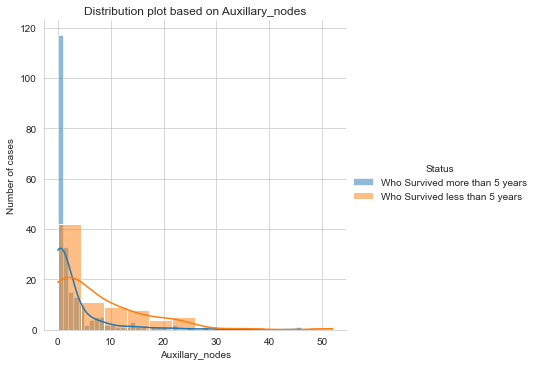

In [15]:
sns.FacetGrid(data,hue="Status",height=5)\
.map(sns.histplot,'Auxillary_nodes',kde=True)\
.add_legend()
plt.xlabel('Auxillary_nodes')
plt.ylabel('Number of cases')
plt.title('Distribution plot based on Auxillary_nodes')
plt.show()

#### Observation
1. Who got less than 3 number of auxillary nodes they are having high chance of surviving more than 5 years

[ 0.          3.06666667  6.13333333  9.2        12.26666667 15.33333333
 18.4        21.46666667 24.53333333 27.6        30.66666667 33.73333333
 36.8        39.86666667 42.93333333 46.        ]
[ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.13333333
 41.6        45.06666667 48.53333333 52.        ]
[0.79111111 0.07111111 0.05333333 0.01777778 0.02222222 0.00888889
 0.00888889 0.00888889 0.00444444 0.00888889 0.         0.
 0.         0.         0.00444444]
[0.48148148 0.12345679 0.11111111 0.09876543 0.04938272 0.03703704
 0.07407407 0.         0.         0.         0.01234568 0.
 0.         0.         0.01234568]


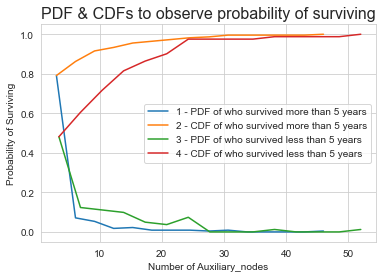

In [16]:
#pdf and cdf
count1,bin_edges1 = np.histogram(more_survived['Auxillary_nodes'],bins=15,density=True)
count2,bin_edges2 = np.histogram(less_survived['Auxillary_nodes'],bins=15,density=True)
pdf1 = count1 / sum(count1)
pdf2 = count2 / sum(count2)
print(bin_edges1)
print(bin_edges2)
print(pdf1)
print(pdf2)
cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:], cdf1)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('Number of Auxiliary_nodes')
plt.ylabel('Probability of Surviving')
plt.title('PDF & CDFs to observe probability of surviving', size = 16)
plt.legend(["1 - PDF of who survived more than 5 years",\
            "2 - CDF of who survived more than 5 years",\
            "3 - PDF of who survived less than 5 years",\
            "4 - CDF of who survived less than 5 years"])
plt.show()

#### Observations
1. For People who got auxillary nodes more than 5 they are having nearly < 10 % chance of surviving more than 5 years
2. For People who got auxillary nodes less than 5 they are having nearly 80 % chance of surviving more than 5 years
3. For People who got auxillary nodes less than 5 they are having nearly 48 % chance of surviving less than 5 years
4. For People who got auxillary nodes more than 25 they are having nearly < 1 % chance of surviving less than 5 years

### Mean, Standard Deviation ,Median, Quantiles, Percentile

In [17]:
print("Mean of more survived: {}".format(np.mean(more_survived.Auxillary_nodes)))
print("Mean of less survived: {}".format(np.mean(less_survived.Auxillary_nodes)))
print("StD of more survived : {}".format(np.std(more_survived.Auxillary_nodes)))
print("StD of less survived : {}".format(np.std(less_survived.Auxillary_nodes)))

Mean of more survived: 2.7911111111111113
Mean of less survived: 7.45679012345679
StD of more survived : 5.857258449412131
StD of less survived : 9.128776076761632


In [18]:
print("Median of more survived: {}".format(np.median(more_survived.Auxillary_nodes)))
print("Median of less survived: {}".format(np.median(less_survived.Auxillary_nodes)))

Median of more survived: 0.0
Median of less survived: 4.0


In [33]:
print("Quantiles for more survived :",format(np.percentile(more_survived.Auxillary_nodes,np.arange(0,100,25))))
print("Quantiles for less survived :",format(np.percentile(less_survived.Auxillary_nodes,np.arange(0,100,25))))
print("90th percentile for more survived :",format(np.percentile(more_survived.Auxillary_nodes,90)))
print("90th percentile for less survived :",format(np.percentile(less_survived.Auxillary_nodes,90)))

Quantiles for more survived : [0. 0. 0. 3.]
Quantiles for less survived : [ 0.  1.  4. 11.]
90th percentile for more survived : 8.0
90th percentile for less survived : 20.0


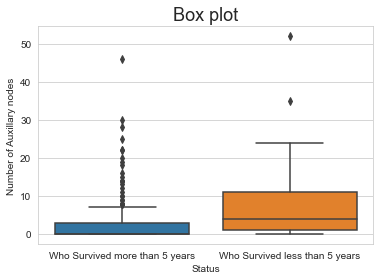

In [20]:
sns.boxplot(x = "Status", y = "Auxillary_nodes", data = data)
plt.xlabel('Status')
plt.ylabel('Number of Auxillary nodes')
plt.title('Box plot', size = 18)
plt.show()


1. Box plot also says if number of auxillary nodes increases then chance of survival rate decreases
2. Most of the patients who survived less than 5 years are having nodes approximately in the range of 4 to 24

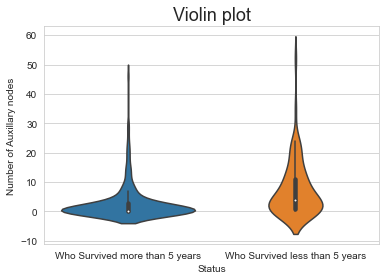

In [21]:
sns.violinplot(x = "Status", y = "Auxillary_nodes", data = data)
plt.xlabel('Status')
plt.ylabel('Number of Auxillary nodes')
plt.title('Violin plot', size = 18)
plt.show()

Violin plot says patient is having high chance of survival if the number of auxillary nodes near to zero

## Conclusion

1. Among the given three features (Patient_age,Operation_year,Auxillary nodes), auxillary nodes is crucial feature to analyse the patient survival status
2. If number of auxillary nodes less than 3 then there is more chance of surviving more than 5 years and if auxillary nodes count increases then the survival chance is decreasing
